<br><br>

# <center> Stochastic Calculus in Quantitative Finance <br> <small>by Gabriel A. Moreira


<br>
Tidying up the house before getting our hands dirty:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc, rcParams

BKG_COLOR  = "black"
FONT_COLOR = 'white'

plt.rcParams['figure.figsize']   = [16, 8]
plt.rcParams['figure.facecolor'] = BKG_COLOR
plt.rcParams['axes.facecolor']   = BKG_COLOR

rcParams['text.color']      = FONT_COLOR
rcParams['axes.labelcolor'] = FONT_COLOR
rcParams['xtick.color']     = FONT_COLOR
rcParams['ytick.color']     = FONT_COLOR

font = {'size' : 14}
rc('font', **font)

## 1.  The Wiener process or Brownian motion

### 1.1 Definition
A stochastic process $W_t$ is defined as a Wiener process if:  

$\bullet\; W_0$ = 0  
$\bullet\; W$ has independent increments  
$\bullet\; W_{t+u} - W_t \sim N(0,u)$  
$\bullet\; W_t$ is continuous in $t$

Evidently, we have $W_t \sim N(0,t)$

### 1.2 Simulation
Simulating a Wiener process:

In [5]:
def wiener(t_max, dt):
    '''
        Generates a Wiener process in the interval
        [0, t_max] with a step size of dt
    '''
    increments = np.random.normal(0, dt, size=[int(t_max/dt), 1])
    W = np.cumsum(increments)
    return W

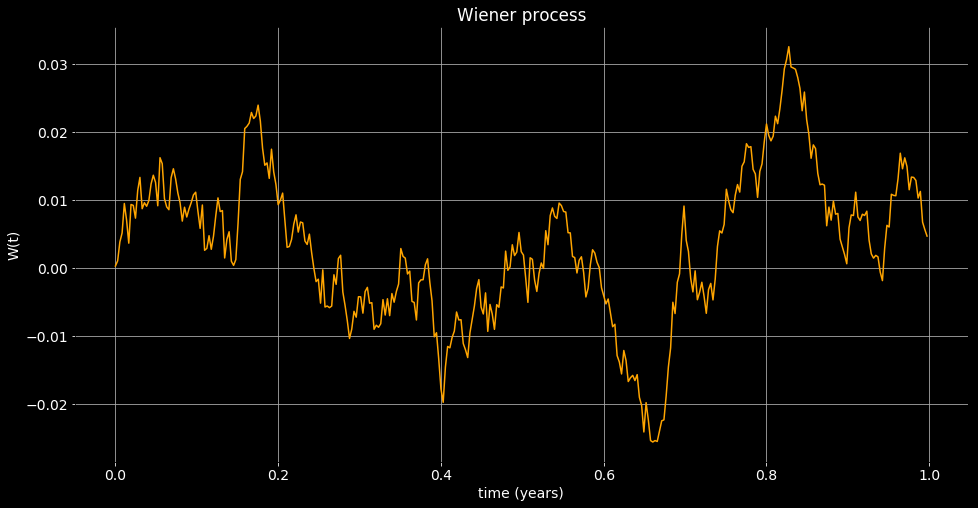

In [18]:
t_max = 1.0         # 1 year
dt    = t_max/365   # 365 days

t = np.arange(0, t_max, dt)
W = wiener(t_max, dt)

plt.plot(t, W, color='orange')
plt.xlabel("time (years)")
plt.ylabel("W(t)")
plt.title("Wiener process");
plt.grid()

## 1. Stochastic differential equations

The stochastic integral, or Itô's integral is a random process $X(t)$ defined as:

$$ X(t) = \int_0^t f(\tau)dW(\tau)$$

for a Wiener process $W$. The following shorthand is also often used

$$ dX = f(t) dW$$

The differential $dW$ is the increment $W(t) - W(t - dt)$. Since $W$ is a Wiener process, then we know that $dW \sim N(0,dt)$. For small $dt$ the term $dW^2$ can be well approximated by $dt$.


In quantitative finance we are often interested in differential equations of the form

$$ \underbrace{dX}_\mathrm{Change\;qty.\;interest} = \underbrace{g(t)dt}_\mathrm{Deterministic} + \underbrace{f(t)dW}_\mathrm{Noise}$$

Without the second term on the right side of the equation, we would have a deterministic ODE. The second term introduces randomness. The solution in this case would be simply:

$$ W(t) = \int_0^t g(\tau)d\tau + \int_0^\tau f(\tau) dX(\tau) $$



## 3. Geometric Brownian motion

### 3.1 Definition
Let $S_t$ be a stochastic process. Then $S_t$ follows a geometric Brownian motion if it satsfies the Stochastic Differential Equation (SDE):

$$ dS = \underbrace{\mu S dt}_\mathrm{deterministic} + \underbrace{\sigma S dW}_\mathrm{unknown} = S(\mu dt + \sigma dW)$$

where $W_t$ is a Wiener process, $\mu$ is the percentage drift and $\sigma$ the percentage volatility. Notice that the deterministic term alone would give rise to an ODE whose solution would be the exponencial $S_0 e^{\mu t}$. So this is just that (an exponential) plus some noise. In order to solve this SDE, we need Ito's lemma:

### 3.2 Ito's Lemma
Let $X_t$ satisfy the following SDE:
$$ dX_t = \mu_t dt + \sigma dW_t$$

and $f(x,t)$ be twice differentiable. Then:

$$ df(t,X_t) = \frac{\partial f}{\partial t}dt + (\nabla_X f)^\top dX_t + \frac{1}{2}(dX_t)^\top (H_X f) dX_t$$


Using this result, the SDE describing a GBM can be solved to produce:

$$
\mathrm{log}\;\frac{S_t}{S_0} = \bigg(\mu - \frac{\sigma^2}{2}\bigg)t + \sigma W_t
$$

Or explicitly:

$$
S_t = S_0\;\mathrm{exp}\;\bigg(\bigg(\mu - \frac{\sigma^2}{2}\bigg)t + \sigma W_t\bigg)
$$

$S_t$ can also be referred to as a lognormal random walk.

### 3.3 Simulation

Simulating GBM:

In [7]:
def gbm(init, mu, sigma, t_max, dt):
    '''
        Simulated a geometric Brownian motion
        with value at t=0 of init, drift mu, 
        volatility sigma. The time interval is
        [0, t_max] with a step size of dt
    '''
    t = np.arange(0,t_max,dt)
    W = wiener(t_max, dt)
    factor = (mu - sigma**2 / 2)
    S = init * np.exp(t*factor + sigma*W)
    return S

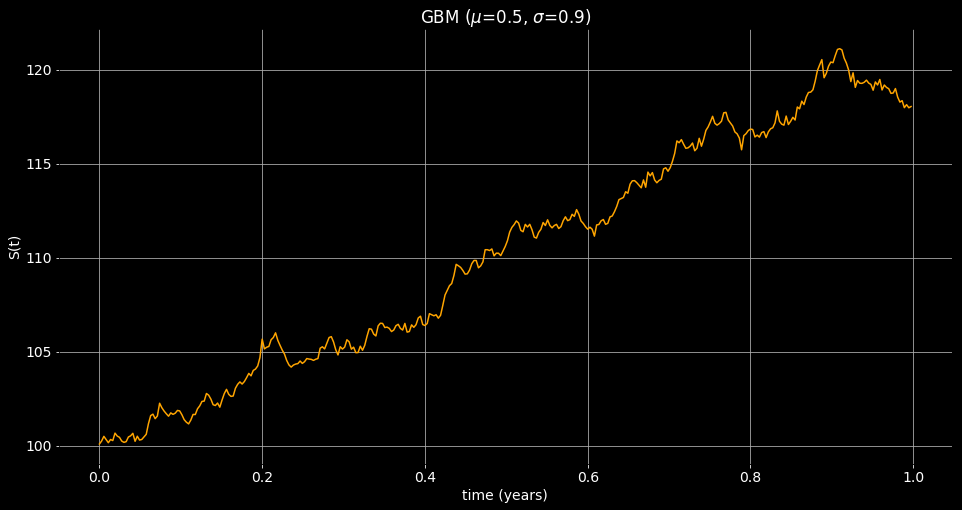

In [17]:
t_max = 1.0
dt    = t_max /365
mu    = 0.5
sigma = 0.9
S0    = 100

t = np.arange(0, t_max, dt)
S = gbm(S0, mu, sigma, t_max, dt)

plt.plot(t, S, color='orange')
plt.xlabel("time (years)")
plt.ylabel("S(t)")
plt.title("GBM ($\mu$=" + str(mu) + ", $\sigma$=" + str(sigma) + ")");
plt.grid()

## 4. Returns and randomness

### 4.1 Definition

We will now analyse the returns of an asset $S$ modeled using GBM. These returns are defined as:

$$ R_i = \frac{S_{i+1}-S_{i}}{S_i} $$


### 4.2 Simulation
The returns can be calculated using the following function:

In [9]:
def returns(stock, timescale=1):
    '''
    Calculates the stock's returns using a 
    certain timescale (in days)
    '''
    return (stock[timescale:] - stock[:-timescale]) / stock[:-timescale]

Let use the previously simulated stock <XYZ> to compute the returns.

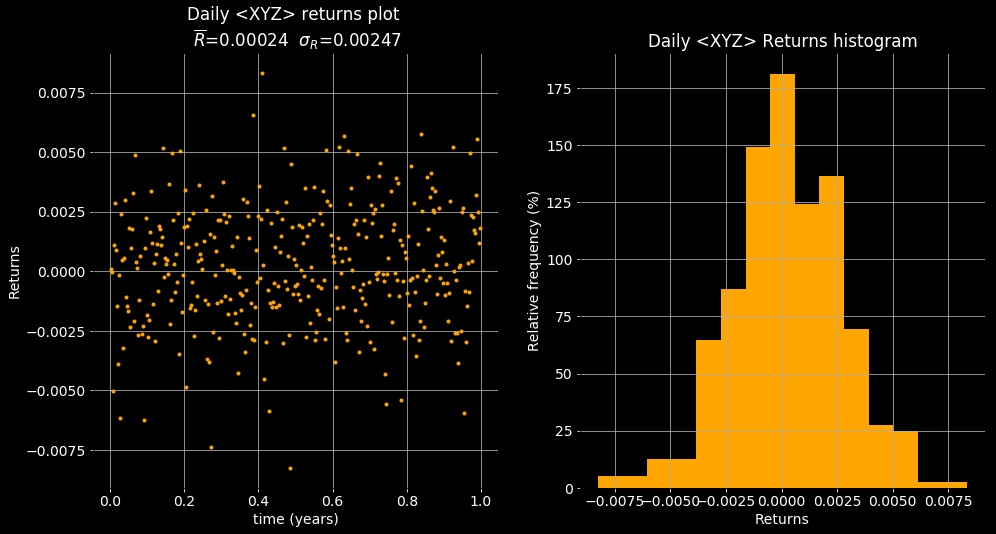

In [10]:
R = returns(S, timescale=1)

fig, ax = plt.subplots(1,2)
ax[0].plot(t[1:], R, '.', color='orange')
ax[0].set_title("Daily <XYZ> returns plot \n $\overline{R}$=" + str(round(np.mean(R),5)) + \
                "  $\sigma_R$=" + str(round(np.std(R),5)))
ax[0].grid()
ax[0].set_xlabel("time (years)")
ax[0].set_ylabel("Returns")
ax[1].hist(R, bins=15, density=True, color='orange');
ax[1].set_title("Daily <XYZ> Returns histogram")
ax[1].set_ylabel("Relative frequency (%)")
ax[1].set_xlabel("Returns")
ax[1].grid();

### 4.3 Effect of the timescale and using GBM

Let us forget about the randomness for now. Our previous model for the GBM can in this case be written (no longer Brownian):

$$ dS = \mu S dt$$

This ODE has the following solution $S(t) = S_0 e^{\mu t}$. We can also reformulate it to produce

$$ \frac{dS}{S} = \mu dt $$

Working in the discrete domain this becomes:

$$ \frac{S_{i+1}-S_i}{S_i} = \mu \delta t$$


All in all this is just to say that the asset $S$ grows in value exponentially just like cash in the bank would with a positive interest rate. Consequently, the bigger the time step $\delta t$ the more the asset will move.

Let's add back the randomness (this is just the GBM):

$$ \frac{dS}{S} = \mu dt + \sigma dW$$

This is just the following limit (interpreted as going from discrete to continuous):

$$ \lim_{dt \rightarrow 0} \frac{S_{i+1}-S_i}{S_i} =  \mu dt + \sigma dW $$

Recall from the definition of Wiener process that the increment $dW$ over a time step $dt$ has a variance of $dt$. Thus the standard deviation of the asset's returns using a time scale of $\delta t$ is $\sigma \sqrt{\delta t}$. 


Let's plot the returns and their histogram for <XYZ> using a larger timescale to show this:

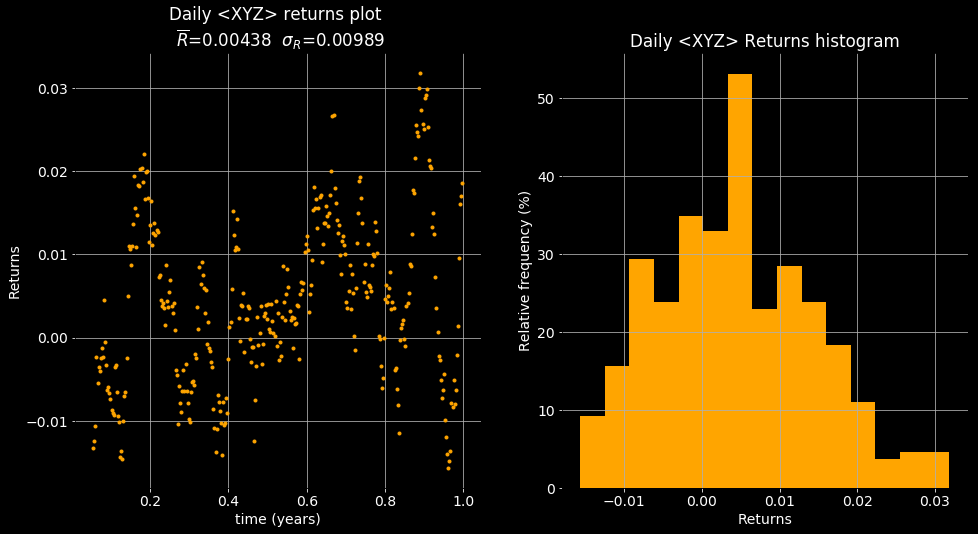

In [11]:
timescale = 20
R = returns(S, timescale)

fig, ax = plt.subplots(1,2)
ax[0].plot(t[timescale:], R, '.', color='orange')
ax[0].set_title("Daily <XYZ> returns plot \n $\overline{R}$=" + str(round(np.mean(R),5)) + \
                "  $\sigma_R$=" + str(round(np.std(R),5)))
ax[0].grid()
ax[0].set_xlabel("time (years)")
ax[0].set_ylabel("Returns")
ax[1].hist(R, bins=15, density=True, color='orange');
ax[1].set_title("Daily <XYZ> Returns histogram")
ax[1].set_ylabel("Relative frequency (%)")
ax[1].set_xlabel("Returns")
ax[1].grid();

The math seems to hold!

### Estimating the drift and volatility

We will now derive the estimators for the drift and volatility $\mu$ and $\sigma$, respectively, given the stock price timeseries or equivalently its returns.

$$ dS = S( \mu dt + \sigma dW) $$

The infinitesimal return is $R = \frac{dS}{S}$. Let us use time steps $\delta t$ such that $1 = M \delta t$:

$$ \frac{1}{M}\sum_i^M R_i = \frac{\mu}{M} \sum_i^M \delta t + \underbrace{\frac{\sigma}{M} \sum_i^M  \delta W}_{\approx 0} \approx  \mu\delta t$$

The right term on the right side of the expression is zero since $W$ is a Wiener process whose increments have zero mean. Thus the estimator is:

$$ \hat{\mu} = \frac{1}{M \delta t} \sum_{i=1}^M R_i$$


The volatility estimate can be derived in similar fashion:

$$ \hat{\sigma} = \sqrt{\frac{1}{(M-1)\delta t}\sum_i^M (R_i - \bar{R})^2}$$


Putting this to practice:

In [12]:
def drift_estimate(stock, delta_t):
    '''
        Estimates the drift of a given stock
        using a step size of delta_t (in days)
    '''
    R = returns(S, delta_t)
    return np.mean(R) / (float(delta_t)/365)


def volatility_estimate(stock, delta_t):
    '''
        Estimates the volatility of a given stock
        using a step size of delta_t (in days)
    '''
    R = returns(S, delta_t)
    return np.sqrt(np.sum(np.square(R - np.mean(R))) / ((float(delta_t)/365) * (len(R)-1)))

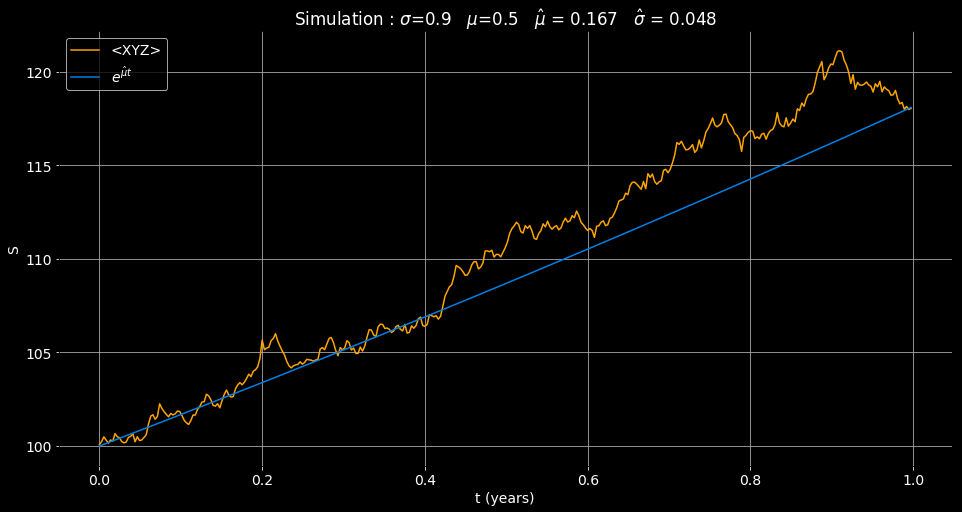

In [19]:
mu_hat    = drift_estimate(S, 1)
sigma_hat = volatility_estimate(S, 1)

plt.plot(t, S, color='orange')
plt.plot(t, S0*np.exp(t*mu_hat), color=[0,0.5,0.9])
plt.title("Simulation : $\sigma$=" + str(sigma) + "   $\mu$=" + str(mu) + "   $\hat{\mu}$ = " + str(round(mu_hat,3)) \
           + "   $\hat{\sigma}$ = " + str(round(sigma_hat,3)))
plt.legend(["<XYZ>", "$e^{\hat{\mu}t}$"])
plt.xlabel("t (years)")
plt.ylabel("S")
plt.grid()